In [2]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import math
from utilities_ex import *
from implementations_ex import *

warnings.filterwarnings("ignore")

Experiment 1:
- Model: Linear Regression 
- polynomials: NO

Result: 
- GD: 0.7454 (2.4s)
- NE: 0.7466 (0.1s)

In [3]:
# prepare data
y, x, _ = load_csv_data("../data/train.csv", sub_sample=False)
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=False) # no polynomials
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=False) 

The 100 of the 100 GD iters has the lowest val loss: loss(train)=0.08452232973950577, loss(val)=0.08489304654717009


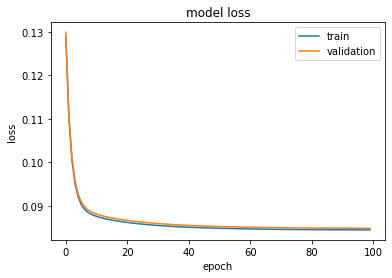

The Accuracy is: 0.7454


In [4]:
# train with linear regression
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses =  mean_squared_error_gd(y_tr, x_tr, initial_w, y_va, x_va, max_iters=100, gamma=0.2, decay=0, lambda_=0)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

In [5]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.08441930890515892
The Accuracy is: 0.7466


Experiment 2:
- Model:Linear Regression 
- polynomials: degree = 10, 30, 50

Result:

degree = 10: 
- GD: 0.7712 (29.3s)
- NE: 0.8154 (0.5s)

degree = 30: 
- GD: 0.7047 (1m 18s)
- NE: 0.8160 (2.7s)


In [6]:
# prepare data
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=True, degree=10)
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=True, degree=10) 

The 200 of the 200 GD iters has the lowest val loss: loss(train)=0.0790304649849867, loss(val)=0.07999068983518613


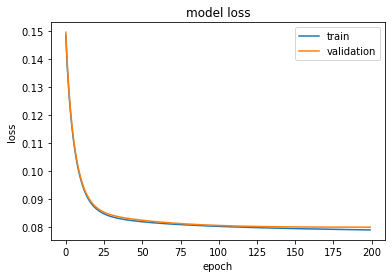

The Accuracy is: 0.7712


In [7]:
# GD
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses =  mean_squared_error_gd(y_tr, x_tr, initial_w, y_va, x_va, max_iters=200, gamma=0.06, decay=0.00001, lambda_=0)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

In [8]:
# NE:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.06892378358763131
The Accuracy is: 0.8154


In [9]:
# degree = 30
# prepare data
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=True, degree=30)
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=True, degree=30) 

The 82 of the 200 GD iters has the lowest val loss: loss(train)=0.0930965879664271, loss(val)=0.09489685624093958


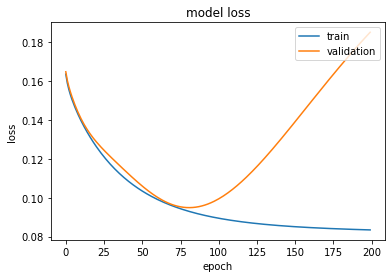

The Accuracy is: 0.7047


In [10]:
# GD
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses =  mean_squared_error_gd(y_tr, x_tr, initial_w, y_va, x_va, max_iters=200, gamma=0.01, decay=0.00001, lambda_=0)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

In [11]:
# NE:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.07738754895170799
The Accuracy is: 0.8011


Higher degree doesn't significantly improve accuracy. To save computing power, we use degree=10

Experiment 3:
- Model: Logistic Regression 
- polynomials: degree = 10

Result:

degree = 10: 
- GD: 0.7791 (2m 6s)
- SGD: 0.7850 (59.7s)


In [12]:
# prepare data
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=True, degree=10)
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=True, degree=10) 

The 250 of the 250 GD iters has the lowest val loss: loss(train)=nan, loss(val)=0.46764609557849507


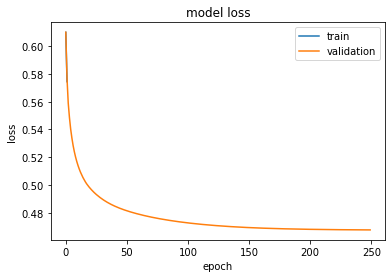

The Accuracy is: 0.7791


In [13]:
# GD
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses = logistic_regression(y_tr, x_tr, initial_w, y_va, x_va, max_iters=250, gamma=0.5, decay=0.0001)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=True)

The 120 of the 120 GD iters has the lowest val loss: loss(train)=nan, loss(val)=0.4617633019608289


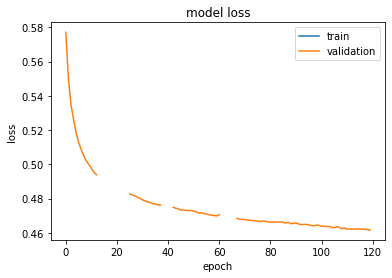

The Accuracy is: 0.7850


In [14]:
# SGD
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses = reg_logistic_regression_sgd(y_tr, x_tr, initial_w, y_va, x_va, max_iters=120, gamma=0.0001, decay=0, lambda_=0)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=True)

#### Our best model is Linear Regression with Polynomials (degree=10) using normal equation

#### We could also add some interactions features

degree = 11

In [15]:
# prepare data
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=True, degree=11, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=True, degree=11, interaction=True) 

In [16]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.06485452416304856
The Accuracy is: 0.8235


degree = 12

In [17]:
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr)
dummies_va = get_dummy(x_va)
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, test=False, poly=True, degree=12, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, test=True, mean=x_mean, std=x_std, poly=True, degree=12, interaction=True) 

In [18]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.07215304708937245
The Accuracy is: 0.8068


- degree 9: 0.8221
- degree 10: 0.8229
- degree 11: 0.8235 --> best
- degree 12: 0.8068